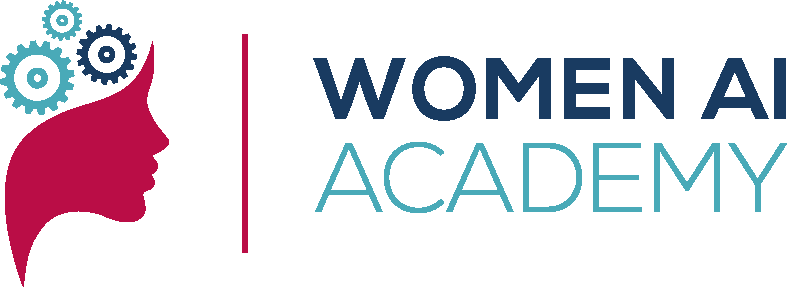

# WAIA Data Science with Python 2021

## Boston housing dataset - Linear regression

After working on a classification dataset from the scikit-learn database, let's try out a new dataset to work on our linear regression skills.

Attributes:
- CRIM per capita crime rate by town

- ZN proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS proportion of non-retail business acres per town

- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX nitric oxides concentration (parts per 10 million)

- RM average number of rooms per dwelling

- AGE proportion of owner-occupied units built prior to 1940

- DIS weighted distances to five Boston employment centres

- RAD index of accessibility to radial highways

- TAX full-value property-tax rate per $10,000

- PTRATIO pupil-teacher ratio by town

- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT % lower status of the population

- MEDV Median value of owner-occupied homes in $1000’s

First, load the Boston housing dataset from scikit-learn. Create a DataFrame from the feature data as well as the target variable.

In [62]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
boston_dataset = load_boston()

print(boston.keys())

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [63]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [65]:
boston['MEDV'] = boston_dataset.target

In [72]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Linear regression for one parameter

Analyse the correlation between our target variable (MEDV) and all the other features in the DataFrame. If  you were to develop a linear regression model with only one parameter (univariate), which one would this be?

In [75]:
bh_corr = boston.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
bh_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
bh_corr[bh_corr['Feature 1'] == 'MEDV']

,Feature 1,Feature 2,Correlation Coefficient
0,MEDV,MEDV,1.000000
23,MEDV,LSTAT,0.737663
31,MEDV,RM,0.695360
64,MEDV,PTRATIO,0.507787
75,MEDV,INDUS,0.483725
77,MEDV,TAX,0.468536
90,MEDV,NOX,0.427321
102,MEDV,CRIM,0.388305
108,MEDV,RAD,0.381626
114,MEDV,AGE,0.376955


Create a scatter plot between this variable and MEDV to visually analyse the correlation and relationship between these parameters

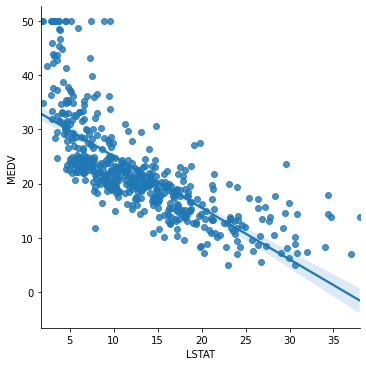

In [78]:
import seaborn as sns
sns.lmplot(x="LSTAT", y="MEDV", data = boston)

Create a linear regression model to describe the relationship between these parameters and compute the mean absolute error

In [80]:
y = boston['MEDV']

In [99]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(boston["LSTAT"].values, y, test_size=0.2,random_state=0)

In [114]:
train_X = np.array(train_X)
train_y = np.array(train_y)
train_X.shape

(404, 1)

In [111]:
train_X = train_X.reshape(-1,1)
test_X = test_X.reshape(-1,1)
train_y = train_y.reshape(-1,1)
test_y = test_y.reshape(-1,1)
train_X.shape

(404, 1)

In [113]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

reg = LinearRegression(normalize=True) 
reg.fit(train_X,train_y)
y_pred = reg.predict(test_X)
mean_absolute_error(test_y, y_pred)

4.864010561669799

## Multivariate linear regression 

Does the accuracy improve if you train a model with all the 

In [116]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(boston.values, y, test_size=0.2,random_state=0)

In [117]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

reg = LinearRegression(normalize=True) 
reg.fit(train_X,train_y)
y_pred = reg.predict(test_X)
mean_absolute_error(test_y, y_pred)

5.1923607026194576e-14